In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform
import os
import open3d as o3d
import torch
import h5py
from io import StringIO

In [16]:
ot = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e058/004/o_train_018', delimiter=',')
gt = np.genfromtxt('C:/cherepashkin1/598test/plot_output/e058/004/gt_train', delimiter=',')

In [6]:
ot.shape

(36, 1500)

In [17]:
gt.shape

(36, 1500)

In [9]:
oo = ot[0]

In [13]:
p0 = oo.reshape(3,500)

In [18]:
p1 = gt[0].reshape(3,500)

In [ ]:
oo.reshape(3,500)

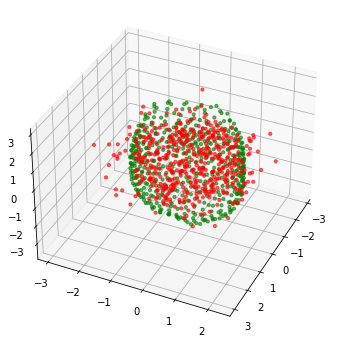

In [21]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.view_init(elev=35, azim=25)

In [22]:
oo.shape

(1500,)

In [24]:
p0.shape

(3, 500)

In [25]:
from numpy import linalg as LA

In [28]:
n = LA.norm(p0, axis =0)

In [29]:
n.shape

(500,)

In [30]:
x = p0/LA.norm(p0, axis =0)

In [31]:
x.shape

(3, 500)

In [ ]:
bX = 

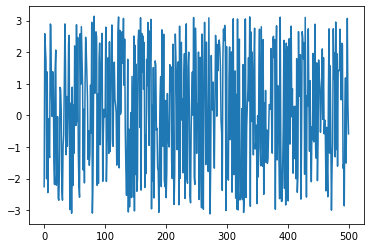

In [35]:
plt.plot(np.arctan2(x[1,:],x[0,:]))

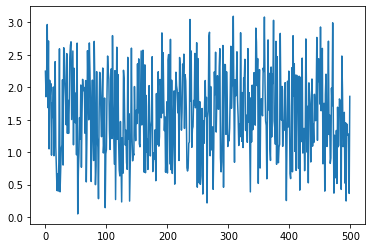

In [37]:
plt.plot(np.arccos(x[2,:]))

In [38]:
bX = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/bX_500.csv', delimiter=',')

In [39]:
dirs = bX[:2,:]

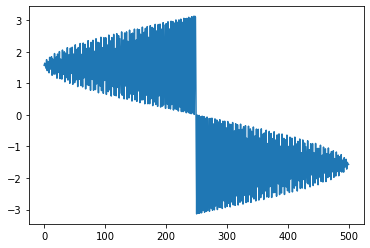

In [40]:
plt.plot(dirs[0,:])

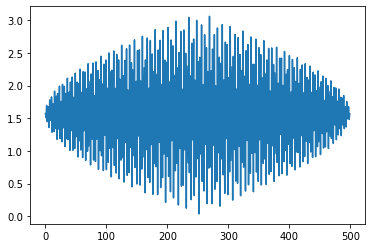

In [41]:
plt.plot(dirs[1,:])

In [ ]:
p0[0,:]/p[1,:]

# Check GT directions

In [42]:
x = p1/LA.norm(p1, axis =0)

In [31]:
x.shape

(3, 500)

In [ ]:
bX = 

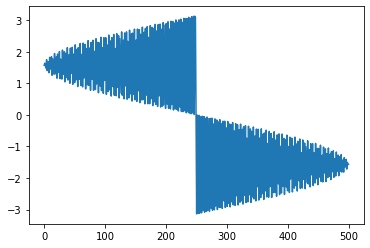

In [43]:
plt.plot(np.arctan2(x[1,:],x[0,:]))

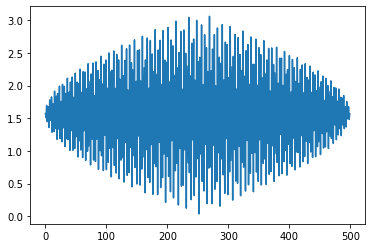

In [44]:
plt.plot(np.arccos(x[2,:]))

# Check einsum

In [ ]:
f_n = 1484737/1494452

In [45]:
F_N = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/598csv11/1484737/1494452_F_N.csv', delimiter=',')

In [46]:
Y_N = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [47]:
Y_N2 = Y_N[:500,:]

In [49]:
F_N.shape

(441,)

In [51]:
Y_N2.shape

(500, 441)

In [53]:
f_n = np.expand_dims(F_N,axis=0)
y_n = np.expand_dims(Y_N2,axis=0)

In [58]:
far = np.einsum('bh,bph->bp', f_n, y_n)

In [59]:
far.shape

(1, 500)

In [60]:
f = far[0]

In [65]:
pa = f2p(far, dirs.transpose(), 500, 0.05)

In [66]:
pa.shape

(1, 3, 500)

In [68]:
pa[0].shape

(3, 500)

In [62]:
iscuda = False

In [61]:
def f2p(far, dirs, nsp, vox2mm):
    if isinstance(far,torch.Tensor):
        p = torch.zeros(\
            far.shape[0],3,nsp)
        # print(far.shape, dirs.shape)
        p = p.cuda() if iscuda else p
        for i in range(far.shape[0]):
            # far = torch.matmul(y_n[i], f_n[i])
            p[i,0,:]=far[i]*torch.cos(dirs[i,:,0])*\
                torch.sin(dirs[i,:,1])
            p[i,1,:]=far[i]*torch.sin(dirs[i,:,0])*\
                torch.sin(dirs[i,:,1])
            p[i,2,:]=far[i]*torch.cos(dirs[i,:,1])
    elif isinstance(far,np.ndarray):
        p = np.zeros(\
            [far.shape[0],3,nsp])
        dirs = dirs.detach().cpu().numpy() if\
            isinstance(dirs,torch.Tensor) else dirs
        # dirs = dirs.transpose() if max(dirs.shape[0]>
        dirs = np.expand_dims(dirs, axis=0) if len(dirs.shape) == 2 else dirs
        # print(far.shape, dirs.shape)
        # p = p.cuda() if iscuda else p
        # print(gf())
        for i in range(far.shape[0]):
            # far = torch.matmul(y_n[i], f_n[i])
            p[i,0,:]=far[i]*np.cos(dirs[i,:,0])*\
                np.sin(dirs[i,:,1])
            p[i,1,:]=far[i]*np.sin(dirs[i,:,0])*\
                np.sin(dirs[i,:,1])
            p[i,2,:]=far[i]*np.cos(dirs[i,:,1])
    # print(p.shape, getframeinfo(currentframe()).lineno)
    p *= vox2mm
    return p

In [70]:
pa.shape

(1, 3, 500)

In [71]:
pb = np.squeeze(pa)

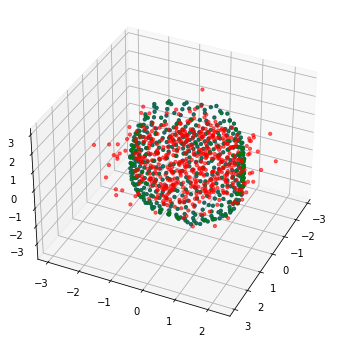

In [74]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.scatter(pb[0,:],pb[1,:],pb[2,:], marker='o', s=10, c="b", alpha=0.6)
ax.view_init(elev=35, azim=25)

# Check random input

In [ ]:
f_n = 1484737/1494452

In [45]:
F_N = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/598csv11/1484737/1494452_F_N.csv', delimiter=',')

In [75]:
F_N = np.random.rand(441)

In [46]:
Y_N = np.genfromtxt('C:/cherepashkin1/phenoseed_csv/Y_N_500.csv', delimiter=',')

In [47]:
Y_N2 = Y_N[:500,:]

In [49]:
F_N.shape

(441,)

In [51]:
Y_N2.shape

(500, 441)

In [53]:
f_n = np.expand_dims(F_N,axis=0)
y_n = np.expand_dims(Y_N2,axis=0)

In [58]:
far = np.einsum('bh,bph->bp', f_n, y_n)

In [59]:
far.shape

(1, 500)

In [60]:
f = far[0]

In [65]:
pa = f2p(far, dirs.transpose(), 500, 0.05)

In [66]:
pa.shape

(1, 3, 500)

In [68]:
pa[0].shape

(3, 500)

In [62]:
iscuda = False

In [61]:
def f2p(far, dirs, nsp, vox2mm):
    if isinstance(far,torch.Tensor):
        p = torch.zeros(\
            far.shape[0],3,nsp)
        # print(far.shape, dirs.shape)
        p = p.cuda() if iscuda else p
        for i in range(far.shape[0]):
            # far = torch.matmul(y_n[i], f_n[i])
            p[i,0,:]=far[i]*torch.cos(dirs[i,:,0])*\
                torch.sin(dirs[i,:,1])
            p[i,1,:]=far[i]*torch.sin(dirs[i,:,0])*\
                torch.sin(dirs[i,:,1])
            p[i,2,:]=far[i]*torch.cos(dirs[i,:,1])
    elif isinstance(far,np.ndarray):
        p = np.zeros(\
            [far.shape[0],3,nsp])
        dirs = dirs.detach().cpu().numpy() if\
            isinstance(dirs,torch.Tensor) else dirs
        # dirs = dirs.transpose() if max(dirs.shape[0]>
        dirs = np.expand_dims(dirs, axis=0) if len(dirs.shape) == 2 else dirs
        # print(far.shape, dirs.shape)
        # p = p.cuda() if iscuda else p
        # print(gf())
        for i in range(far.shape[0]):
            # far = torch.matmul(y_n[i], f_n[i])
            p[i,0,:]=far[i]*np.cos(dirs[i,:,0])*\
                np.sin(dirs[i,:,1])
            p[i,1,:]=far[i]*np.sin(dirs[i,:,0])*\
                np.sin(dirs[i,:,1])
            p[i,2,:]=far[i]*np.cos(dirs[i,:,1])
    # print(p.shape, getframeinfo(currentframe()).lineno)
    p *= vox2mm
    return p

In [70]:
pa.shape

(1, 3, 500)

In [71]:
pb = np.squeeze(pa)

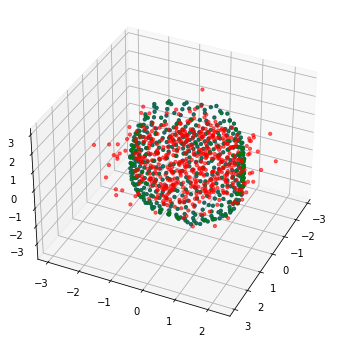

In [74]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(p0[0,:],p0[1,:],p0[2,:], marker='o', s=10, c="r", alpha=0.6)
ax.scatter(p1[0,:],p1[1,:],p1[2,:], marker='o', s=10, c="g", alpha=0.6)
ax.scatter(pb[0,:],pb[1,:],pb[2,:], marker='o', s=10, c="b", alpha=0.6)
ax.view_init(elev=35, azim=25)